In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [4]:
tmp = [0.5 for _ in range(len(train))]

from sklearn.metrics import roc_auc_score

roc_auc_score(train['claim'].values, tmp)

0.5

In [33]:
df = train.copy()

In [34]:
df.drop('id', axis=1, inplace=True)

In [35]:
df_test = test.copy()
df_test.drop('id', axis=1, inplace=True)

# EDA
### 결측값 비율 보기

In [36]:
nan_ratio = pd.DataFrame(df.isnull().sum() / len(df)*100, columns=['nan_ratio'])
nan_ratio

,nan_ratio
f1,1.591679
f2,1.585729
f3,1.617151
f4,1.624354
f5,1.608174
...,...
f116,1.627382
f117,1.608382
f118,1.588026
claim,0.000000


In [37]:
print(max(nan_ratio['nan_ratio']))
print(min(nan_ratio['nan_ratio']))
print(np.mean(nan_ratio['nan_ratio']))

# 최댁 1.6%, 평균 약 1.5%의 결측값.

1.6366728293310813
0.0
1.5839735231614922


In [38]:
#test값
nan_ratio = pd.DataFrame(df_test.isnull().sum() / len(df_test)*100, columns=['nan_ratio'])
print(max(nan_ratio['nan_ratio']))
print(min(nan_ratio['nan_ratio']))
print(np.mean(nan_ratio['nan_ratio']))

# 최댁 1.6%, 평균 약 1.5%의 결측값.

1.649732306058678
1.567053178080304
1.6077951112840039


### 라벨 비율 보기

In [39]:
y_cnt = pd.DataFrame(df['claim'].value_counts())
y_cnt / len(train)

# claim한 것과 하지 않은 것이 매우 비슷한 비율.

,claim
0,0.501508
1,0.498492


# 분포도 보기

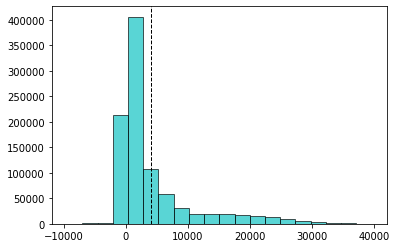

In [40]:
import matplotlib.pyplot as plt 

x = df['f3']
result = plt.hist(x, bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)

# 결측값 채우기

In [41]:
df = df.fillna(df.mean())
df_test = df_test.fillna(df_test.mean())

# train test split

In [42]:
y = df.pop('claim')

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=0.3, random_state=42)

In [44]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(670543, 119)
(670543,)
(287376, 119)
(287376,)


In [45]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
scaled_x_train = pca.fit_transform(X_train)
scaled_x_test = pca.transform(X_test)

In [47]:
scaled_x_test.shape

(287376, 107)

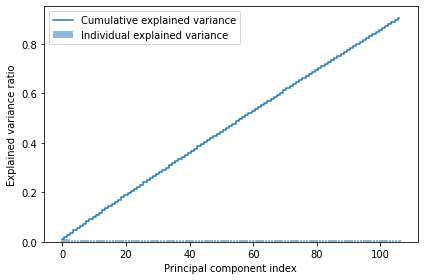

In [48]:
import matplotlib.pyplot as plt 

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 구간별로 나누기

In [49]:
X_train

array([[-0.10512127,  0.93550222, -0.5232783 , ..., -0.05106301,
        -0.13933011,  1.03617043],
       [ 0.18939093, -0.21108907, -0.60642882, ..., -0.64613729,
        -1.01857943,  2.02331578],
       [-0.15183365,  0.96883456, -0.42226393, ...,  0.92818245,
        -0.09887166, -0.93812028],
       ...,
       [-1.69133132,  1.06965802, -0.5091044 , ..., -0.37282831,
        -0.11958224,  0.54259775],
       [-0.22528835, -2.32567708, -0.57538699, ...,  1.49698562,
        -1.05081783, -0.93812028],
       [-0.21759155,  0.72710621, -0.08217199, ...,  0.40569689,
         0.1307714 , -0.4445476 ]])

In [51]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=64, encode='ordinal',strategy='uniform')

X_train = kb.fit_transform(X_train)
X_test = kb.transform(X_test)

In [52]:
X_train

array([[26., 59., 13., ..., 19., 14., 18.],
       [28., 39., 12., ..., 11.,  6., 27.],
       [26., 60., 14., ..., 34., 14.,  0.],
       ...,
       [18., 61., 13., ..., 15., 14., 13.],
       [26.,  3., 12., ..., 42.,  6.,  0.],
       [26., 56., 16., ..., 26., 16.,  4.]])

# 모델링

In [53]:
from sklearn.metrics import roc_auc_score

def model_compare(model, x_train, x_test):
    model.fit(x_train, y_train)

    pred_train = model.predict(x_train)
    pred_train_proba = model.predict_proba(x_train)
    pred_test_proba = model.predict_proba(x_test)


    # train class predict
    print('train class predict:', round(roc_auc_score(y_train, pred_train), 5))

    # train proba predict
    pred_train_proba_pd = pd.DataFrame(pred_train_proba,
                                    columns=['class'+str(clf.classes_[0]), 'class'+str(clf.classes_[1])])
    print('train proba predict:', round(roc_auc_score(y_train, pred_train_proba_pd['class1'].values), 5))

    # test proba predict
    pred_test_proba_pd = pd.DataFrame(pred_test_proba,
                                    columns=['class'+str(clf.classes_[0]), 'class'+str(clf.classes_[1])])

    print('test proba predict:', round(roc_auc_score(y_test, pred_test_proba_pd['class1'].values), 5))



In [54]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200, random_state=0)
model_compare(clf, X_train, X_test)

train class predict: 0.73982
train proba predict: 0.79888
test proba predict: 0.62878


In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
model_compare(clf, X_train, X_test)

train class predict: 1.0
train proba predict: 1.0
test proba predict: 0.51168


In [ ]:
# SVM
from sklearn.svm import SVC

clf = SVC(gamma='auto')
model_compare(clf, X_train, X_test)

In [56]:
# GNB
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
model_compare(clf, X_train, X_test)

train class predict: 0.71503
train proba predict: 0.78352
test proba predict: 0.58998


In [55]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
model_compare(clf, X_train, X_test)

train class predict: 0.77309
train proba predict: 0.77706
test proba predict: 0.58109


from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()
model_compare(lgbm_model, X_train, X_test)

import xgboost as xgb

xgb_model=xgb.XGBClassifier()

model_compare(xgb_model, X_train, X_test)